In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

data=pd.read_csv('/Users/juyoung/Desktop/코딩테스트/[2021 JOYCITY 인턴공채] 과제전형_데이터사이언스/datascience_rawdata.csv', encoding='utf-8')
data

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user
0,0,375377,1,148,0,2020-09-23,FR,Organic,0
1,0,295842,1,67,0,2020-09-23,DE,Organic,0
2,0,229618,1,36,0,2020-09-23,DE,Organic,0
3,0,335545,1,116,0,2020-09-23,FR,Organic,0
4,0,300981,1,104,0,2020-09-23,FR,Organic,0
...,...,...,...,...,...,...,...,...,...
620652,0,306430,1,364,0,2020-09-06,JP,Facebook,1215
620653,0,264902,1,300,0,2020-09-25,AE,Facebook,183940
620654,0,369262,1,76,0,2020-09-25,AE,Facebook,183940
620655,0,296996,3,1836,0,2020-09-25,AE,Facebook,183940


In [2]:
sales_per_user=data.filter(['userid','sales'])
sales_per_user=sales_per_user.groupby(by='userid').sum()
connect_per_user=data.filter(['userid','days_after_registration'])
connect_per_user=connect_per_user.groupby(by='userid').count()
user_per_level=data.filter(['userid','userlevel'])
user_per_level=user_per_level.groupby(by='userid').max()
playtime_per_user=data.filter(['userid','playtime_sec'])
playtime_per_user=playtime_per_user.groupby(by='userid').sum()
playtime_per_user

,playtime_sec
userid,
200000,262
200001,24
200002,29553
200003,190
200004,1065
...,...
399994,50
399995,652
399997,6510


In [3]:
test=data.filter(['userid','country','marketing_cost_per_user','source'])
test=test.drop_duplicates(['userid'])
test=test.sort_values(by='userid')
test=test.set_index('userid')
test['sales']=sales_per_user
test['connect']=connect_per_user
test['max_level']=user_per_level
test['total_playtime']=playtime_per_user
test

,country,marketing_cost_per_user,source,sales,connect,max_level,total_playtime
userid,,,,,,,
200000,CA,6190,Facebook,0,1,1,262
200001,US,54,Instagram,0,1,1,24
200002,CA,12547,Facebook,0,4,6,29553
200003,CA,7142,Facebook,0,1,1,190
200004,KR,263,Google,0,1,1,1065
...,...,...,...,...,...,...,...
399994,DE,0,Organic,0,1,1,50
399995,CA,9196,Instagram,0,1,1,652
399997,US,0,Instagram,0,1,11,6510


In [4]:
def func(x):
    d={}
    d['marketing']=x['marketing_cost_per_user'].sum()
    d['sales']=x['sales'].sum()
    d['connect_count']=x['connect'].count()
    return pd.Series(d,index=['marketing','sales','connect_count'])

test1=test.groupby(['country','source','connect']).apply(func)
test1

marketing     sales  connect_count
country source   connect                                    
AE      Facebook 1          8341681         0             24
                 2           376927         0              1
                 4           355128         0              1
                 7           232338         0              1
                 15          357352         0              1
...                             ...       ...            ...
US      Organic  87               0   1121865              6
                 88               0    616014              8
                 89               0    807217              8
                 90               0    159490             13
                 91               0  15983241             56

[2564 rows x 3 columns]

In [5]:
steady_user_count=test.filter(['country','connect'])
steady_user_count=steady_user_count[steady_user_count['connect']!=int(1)]
steady_user_count=steady_user_count.groupby(by='country').count()
steady_user_count=steady_user_count.rename(columns={'connect':'steady_user_count'})

In [6]:
test2=test.copy()
test2=test2[test2['connect']==int(1)]
test2=test2.groupby(by='country').sum()
test2=test2.rename(columns={'connect': 'user_count'})
test2['steady_user_count']=steady_user_count['steady_user_count']
test2

,marketing_cost_per_user,sales,user_count,max_level,total_playtime,steady_user_count
country,,,,,,
AE,9438485,0,253,393,243980,88
BR,271373,0,723,864,437253,148
CA,153663995,334013,18036,23761,14763244,8223
DE,18741902,93323,5773,6992,3593758,2069
EG,266310,0,4940,5645,3120892,1091
FR,1741915,16280,5562,6732,4360731,2126
HK,7649617,126992,2029,2534,1490365,841
ID,657605,0,471,550,247394,92
IL,99979,0,749,1059,526182,217


# 국가별 총 유저 수와 2이상 접속한 유저 수

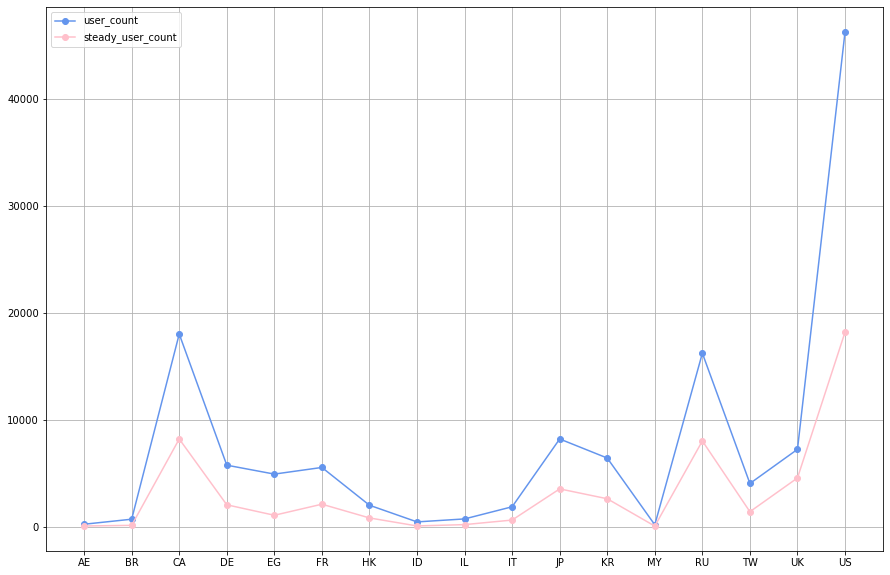

In [7]:
plt.figure(figsize=(15,10))
plt.plot(test2.index,test2['user_count'],color='cornflowerblue',marker='o',label='user_count')
plt.plot(test2.index,test2['steady_user_count'],color='pink',marker='o',label='steady_user_count')

plt.legend()
plt.grid(True)
plt.show()

# 국가별 총유저수에서 이틀이상 접속한 유저의 비율

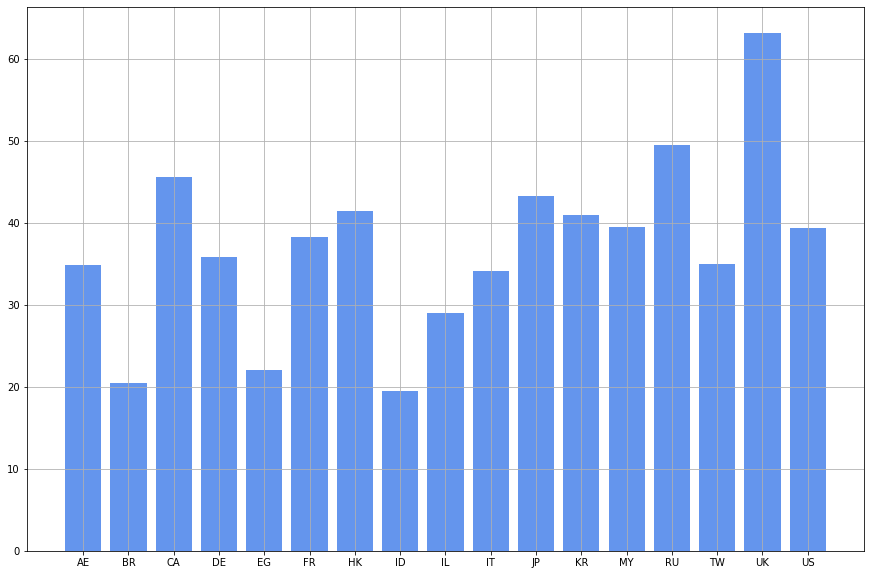

In [8]:
plt.figure(figsize=(15,10))
plt.bar(test2.index,(test2['steady_user_count']/test2['user_count'])*100,color='cornflowerblue')

plt.grid(True)
plt.show()

In [9]:
test3=test.copy()
test3['sale/marketing']=test3['sales']/test3['marketing_cost_per_user']
test3.sort_values(by='userid')

,country,marketing_cost_per_user,source,sales,connect,max_level,total_playtime,sale/marketing
userid,,,,,,,,
200000,CA,6190,Facebook,0,1,1,262,0.0
200001,US,54,Instagram,0,1,1,24,0.0
200002,CA,12547,Facebook,0,4,6,29553,0.0
200003,CA,7142,Facebook,0,1,1,190,0.0
200004,KR,263,Google,0,1,1,1065,0.0
...,...,...,...,...,...,...,...,...
399994,DE,0,Organic,0,1,1,50,NaN
399995,CA,9196,Instagram,0,1,1,652,0.0
399997,US,0,Instagram,0,1,11,6510,NaN


In [10]:
no_marketing_no_cash=test3.loc[(test3['marketing_cost_per_user']==0)&(test3['sales']==0)]
no_marketing_cash=test3.loc[(test3['marketing_cost_per_user']==0)&(test3['sales']!=0)]
marketing_no_cash=test3.loc[(test3['marketing_cost_per_user']!=0)&(test3['sales']==0)]
marketing_cash=test3.loc[(test3['marketing_cost_per_user']!=0)&(test3['sales']!=0)]
marketing_cash

,country,marketing_cost_per_user,source,sales,connect,max_level,total_playtime,sale/marketing
userid,,,,,,,,
200120,TW,633,Google,8680,4,5,11756,13.712480
200564,HK,1065,Google,39530,91,26,721128,37.117371
200623,DE,36571,Instagram,56261,85,23,519143,1.538405
200994,CA,19013,Instagram,1260,1,11,1992,0.066270
201064,JP,204,Google,176036,49,21,172982,862.921569
...,...,...,...,...,...,...,...,...
399491,TW,147,Facebook,58111,47,20,804403,395.312925
399507,JP,240,Google,277541,45,18,100381,1156.420833
399641,JP,355,Google,201385,47,23,509300,567.281690


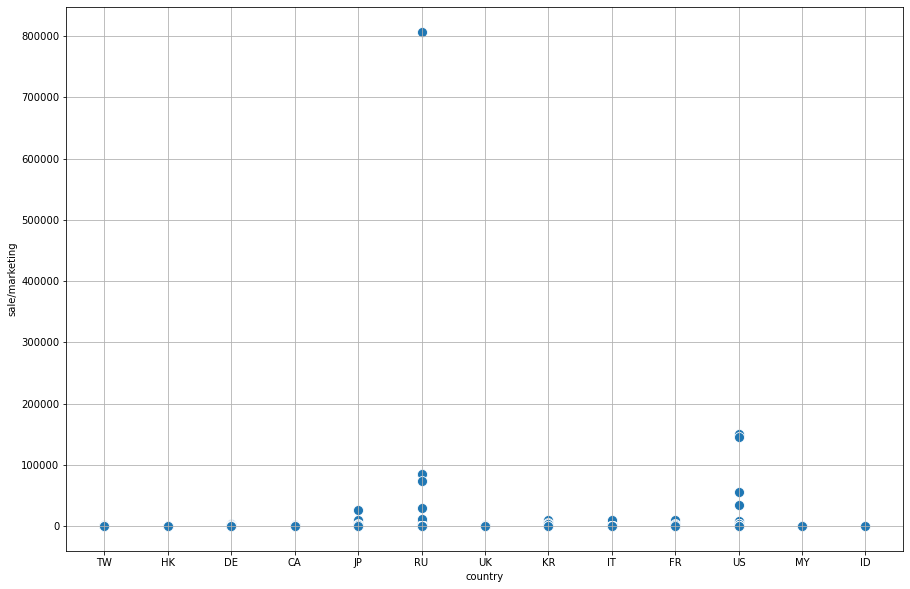

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='country', y='sale/marketing', s=100, data=marketing_cash)
plt.grid(True)
plt.show()

# x:국가 y:방문횟수

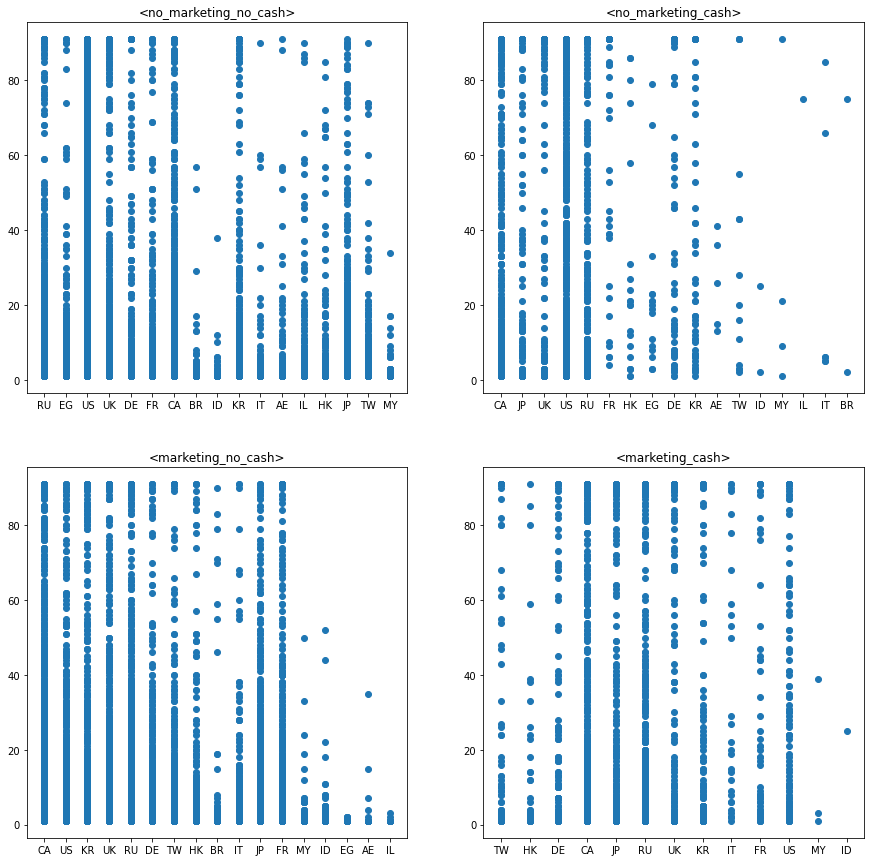

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(no_marketing_no_cash['country'],no_marketing_no_cash['connect'])
plt.title('<no_marketing_no_cash>')

plt.subplot(222)
plt.scatter(no_marketing_cash['country'],no_marketing_cash['connect'])
plt.title('<no_marketing_cash>')

plt.subplot(223)
plt.scatter(marketing_no_cash['country'],marketing_no_cash['connect'])
plt.title('<marketing_no_cash>')

plt.subplot(224)
plt.scatter(marketing_cash['country'],marketing_cash['connect'])
plt.title('<marketing_cash>')

plt.show()

# x:접속횟수 y:최고 레벨

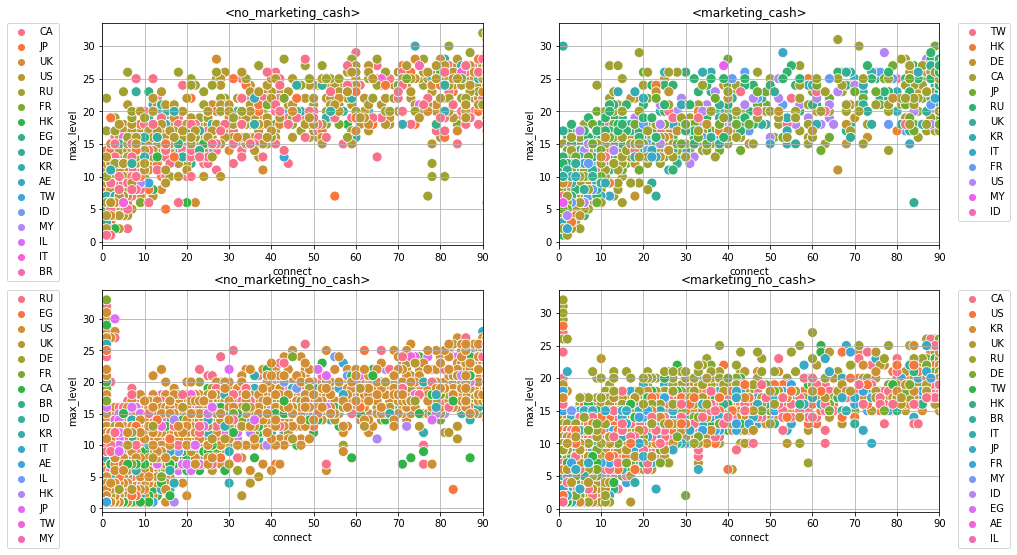

In [13]:
plt.figure(figsize=(15,9))

plt.subplot(221)
sns.scatterplot(x='connect', y='max_level', hue='country', s=100, data=no_marketing_cash)
plt.title('<no_marketing_cash>')
plt.grid(True)
#plt.ylim([0,3500000])
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

plt.subplot(222)
sns.scatterplot(x='connect', y='max_level', hue='country', s=100, data=marketing_cash)
plt.title('<marketing_cash>')
plt.grid(True)
#plt.ylim([0,3500000])
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(223)
sns.scatterplot(x='connect', y='max_level', hue='country', s=100, data=no_marketing_no_cash)
plt.title('<no_marketing_no_cash>')
plt.grid(True)
#plt.ylim([0,3500000])
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

plt.subplot(224)
sns.scatterplot(x='connect', y='max_level', hue='country', s=100, data=marketing_no_cash)
plt.title('<marketing_no_cash>')
plt.grid(True)
#plt.ylim([0,3500000])
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

# x:총 플레이시간 y:sales

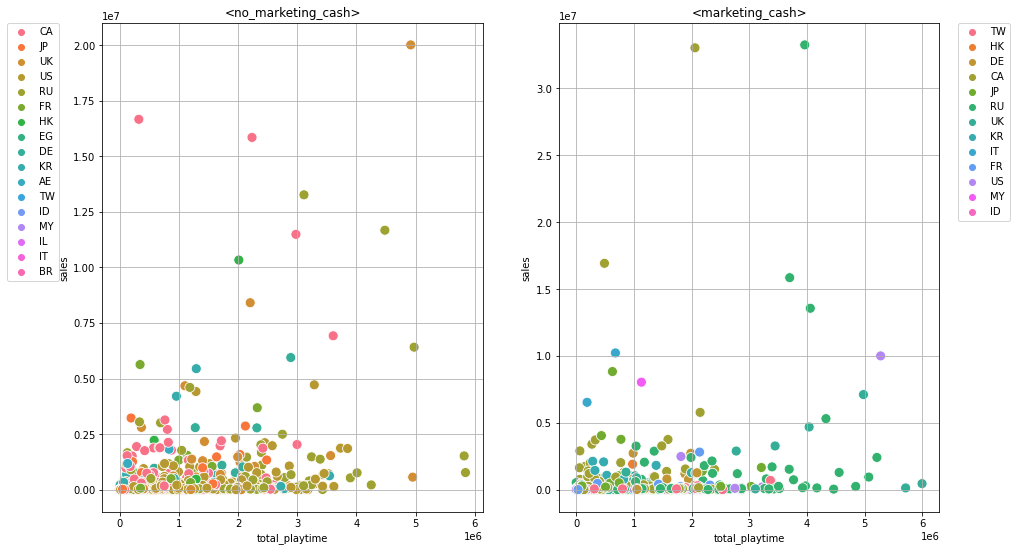

In [14]:
plt.figure(figsize=(15,9))

plt.subplot(121)
sns.scatterplot(x='total_playtime', y='sales', hue='country', s=100, data=no_marketing_cash)
plt.title('<no_marketing_cash>')
plt.grid(True)
#plt.ylim([0,3500000])
#plt.xlim([0,90])
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
sns.scatterplot(x='total_playtime', y='sales', hue='country', s=100, data=marketing_cash)
plt.title('<marketing_cash>')
plt.grid(True)
#plt.ylim([0,3500000])
#plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# x:접속횟수 y:sales

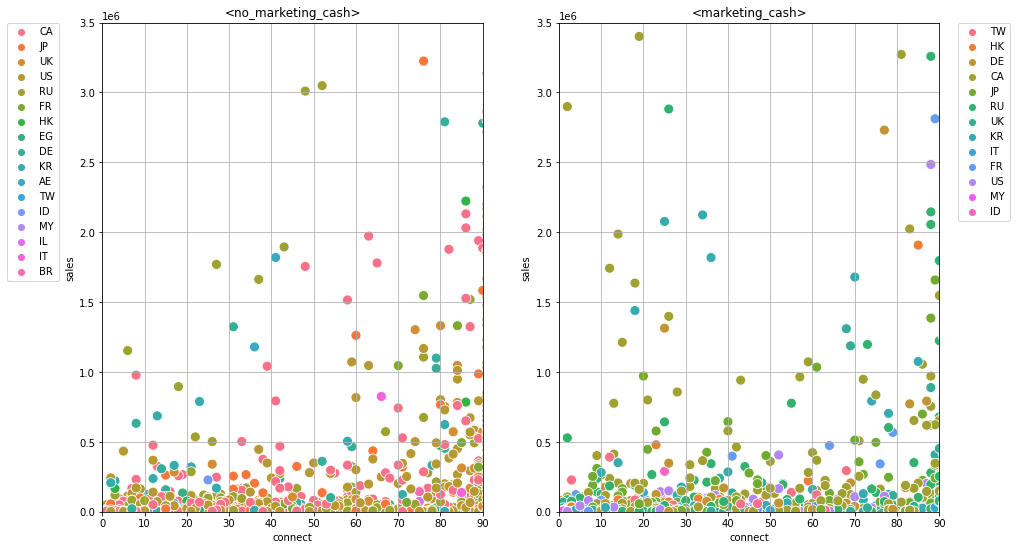

In [15]:
plt.figure(figsize=(15,9))

plt.subplot(121)
sns.scatterplot(x='connect', y='sales', hue='country', s=100, data=no_marketing_cash)
plt.title('<no_marketing_cash>')
plt.grid(True)
plt.ylim([0,3500000])
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
sns.scatterplot(x='connect', y='sales', hue='country', s=100, data=marketing_cash)
plt.title('<marketing_cash>')
plt.grid(True)
plt.ylim([0,3500000])
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# x:마케팅 비용 y:sales

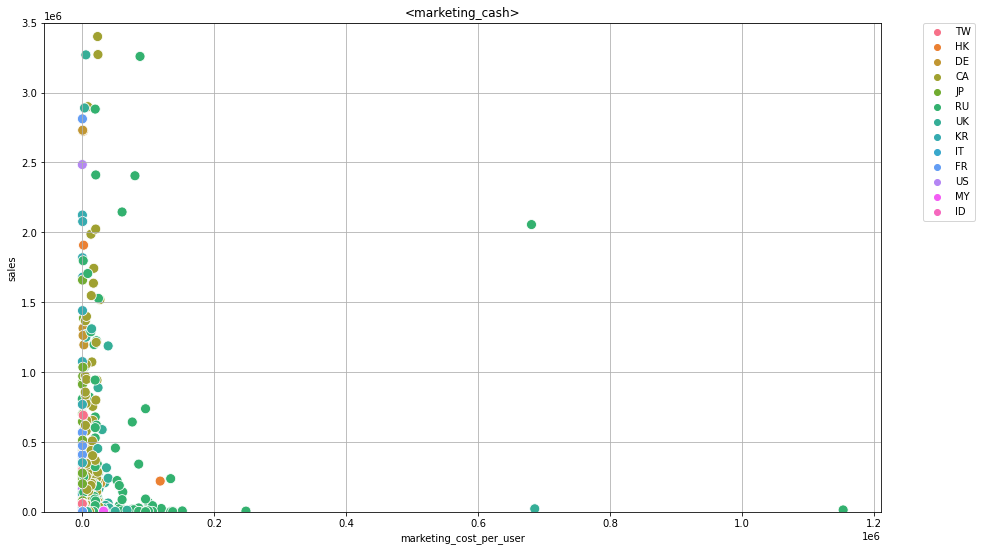

In [16]:
plt.figure(figsize=(15,9))

sns.scatterplot(x='marketing_cost_per_user', y='sales', hue='country', s=100, data=marketing_cash)
plt.title('<marketing_cash>')
plt.grid(True)
plt.ylim([0,3500000])
#plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [17]:
sales_user=test3.loc[(test3['sales']!=0)]
sales_user_per_country=pd.DataFrame(sales_user.groupby(by='country').size(),columns=['sales_user_per_country'])
user_per_country=pd.DataFrame(test.groupby(by='country').size(),columns=['total_user_per_country'])
user_per_country['sales_user_per_country']=sales_user_per_country['sales_user_per_country']
user_per_country

,total_user_per_country,sales_user_per_country
country,,
AE,341,5
BR,871,2
CA,26259,908
DE,7842,154
EG,6031,16
FR,7688,92
HK,2870,56
ID,563,3
IL,966,1


# 국가별 현질하는 유저 비율

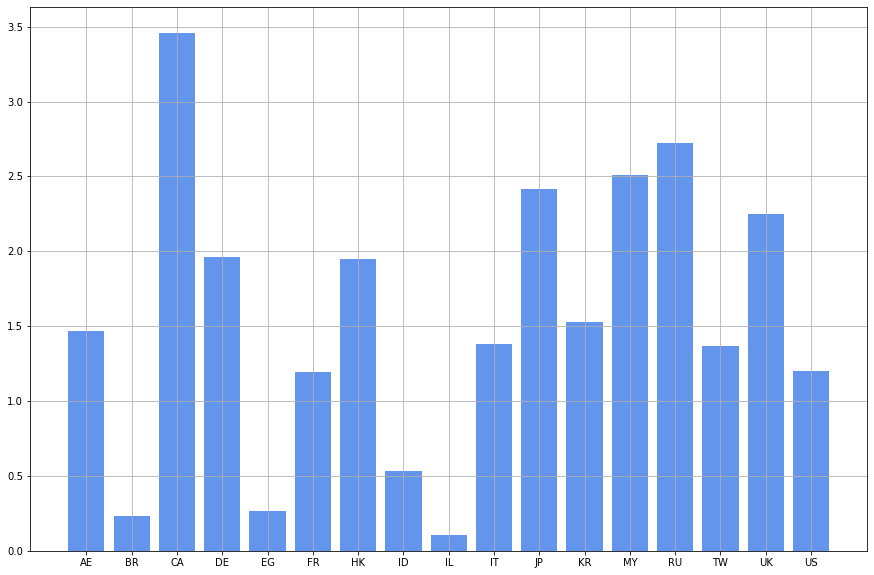

In [18]:
plt.figure(figsize=(15,10))
plt.bar(user_per_country.index,(user_per_country['sales_user_per_country']/user_per_country['total_user_per_country'])*100,color='cornflowerblue')
plt.grid(True)
plt.show()

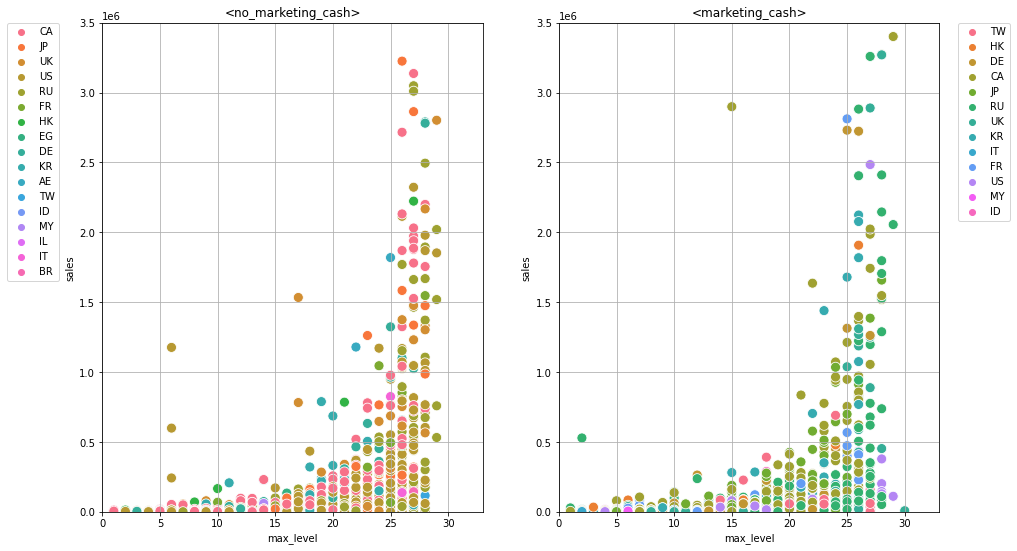

In [21]:
plt.figure(figsize=(15,9))

plt.subplot(121)
sns.scatterplot(x='max_level', y='sales', hue='country', s=100, data=no_marketing_cash)
plt.title('<no_marketing_cash>')
plt.grid(True)
plt.ylim([0,3500000])
plt.xlim([0,33])
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
sns.scatterplot(x='max_level', y='sales', hue='country', s=100, data=marketing_cash)
plt.title('<marketing_cash>')
plt.grid(True)
plt.ylim([0,3500000])
plt.xlim([0,33])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()